In [1]:
# import necessary packages
import cv2
import pytesseract
import easyocr
from matplotlib import pyplot as plt
from util import extract

# create a reader
reader = easyocr.Reader(['en'])

In [2]:
img = cv2.imread('img/1200px-Trucks_in_Cambodia_05.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
roi = extract.roi(img)
roi


0: 416x640 1 car-license-plate, 65.6ms
Speed: 5.2ms preprocess, 65.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


[[347, 192, 866, 489]]

In [5]:
for r in roi:
    x,y,x1,y1 = r
    info = extract.get_info(img[y:y1, x:x1])
    print(type(info))
    print(info)


0: 384x640 1 Phnom_Penh, 6.2ms
Speed: 7.1ms preprocess, 6.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


<class 'str'>
Phnom_Penh


In [6]:
info

'Phnom_Penh'


0: 416x640 1 car-license-plate, 1 info, 81.1ms
Speed: 4.4ms preprocess, 81.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 416x640 1 Phnom_Penh, 16.2ms
Speed: 2.3ms preprocess, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Phnom_Penh


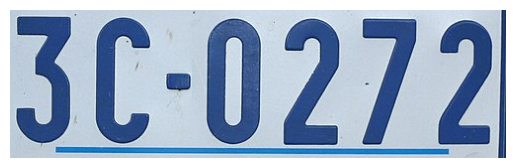

In [119]:
roi = extract.roi(img)
if len(roi) > 0:
    x,y,x1, y1 = extract.area(roi)
    place = extract.get_info(img)

    print(place)

    plt.imshow(img_rgb[y:y1, x:x1+10])
    plt.axis("off")

In [121]:
custom_conf = r'--oem 3 --psm 6'

# read with origin image
txt = pytesseract.image_to_string(gray[y:y1, x:x1+10], config=custom_conf)
txt = txt.strip()

In [122]:
# read gray scale image
gr_txt = pytesseract.image_to_string(img[y:y1, x:x1+10], config=custom_conf)
gr_txt = gr_txt.strip()

In [123]:
# final result
full_info = place + ' ' + gr_txt
full_info

'Phnom_Penh 3C-0272'

### Testing with EasyOCR

In [124]:
easyocr_result1 =  reader.readtext(img[y:y1, x:x1+10], detail = 0, paragraph=True)[0]
easyocr_result1

'3C.-0272'

In [125]:
easyocr_result2 =  reader.readtext(gray[y:y1, x:x1+10], detail = 0, paragraph=True)[0]
easyocr_result2

'3C-0272'

In [126]:
easyocr_full = place + ' ' + easyocr_result1
easyocr_full 

'Phnom_Penh 3C.-0272'

According to some testing with the real images, we assume that using object detection then apply tesseractOCR is better way to recognize the license plate.

#### visualize result to the image

In [127]:
def plotting(img, xyxy, text):
    x1, y1, x2, y2 = xyxy
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_scale = 1
    text_color = (0, 0, 255) # red
    text_thickness = 2
    text_position = (x1, y1 - 10)

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, text, text_position, font, text_scale, text_color, text_thickness, cv2.LINE_AA)

    return img
    

(-0.5, 1199.5, 728.5, -0.5)

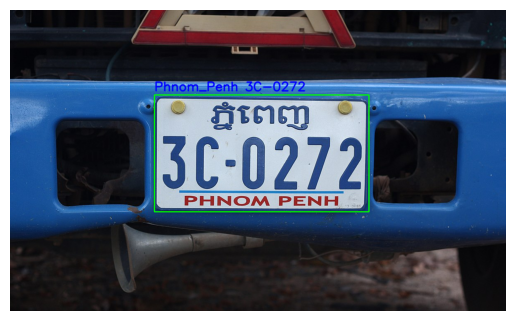

In [128]:
plotted = plotting(img_rgb, extract.area(roi, 1), full_info)

plt.imshow(plotted)
plt.axis("off")

### Video Inferences

In [136]:
# Open the video file
video = cv2.VideoCapture('img/vid_test.mp4')

# Check if the video file was successfully opened
if not video.isOpened():
    print("Error opening video file")

# Read and process each frame of the video
frame_count = 0
while True:
    # Read a frame from the video
    ret, frame = video.read()

    # Check if a frame was successfully read
    if not ret:
        break

    # Process the frame here (e.g., convert to grayscale, perform operations, etc.)
    detect = extract.roi(frame)

    if len(detect) > 0:
        box = extract.area(detect, 1)
        
        data = plotting(frame, box, "")

        # Save the frame as an image
        frame_count += 1
        cv2.imwrite(f'img/test/frame_{frame_count}.jpg', data)
        if frame_count >= 50:
            break

# Release the video file
video.release()


0: 384x640 2 car-license-plates, 6.3ms
Speed: 19.0ms preprocess, 6.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 car-license-plates, 5.9ms
Speed: 2.1ms preprocess, 5.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 car-license-plates, 5.9ms
Speed: 2.2ms preprocess, 5.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 car-license-plates, 8.6ms
Speed: 2.6ms preprocess, 8.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 car-license-plates, 5.9ms
Speed: 2.1ms preprocess, 5.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 car-license-plates, 5.9ms
Speed: 2.2ms preprocess, 5.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 car-license-plate, 5.9ms
Speed: 2.1ms preprocess, 5.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 car-license-plate, 6.0ms
Speed: 2.

In [1]:
from ultralytics import YOLO

model = YOLO('runs/detect/place_classify2/weights/best.pt')

model.predict('test.jpg')


image 1/1 /home/natt.korat/yolo/test.jpg: 352x640 1 Pailin, 200.8ms
Speed: 9.2ms preprocess, 200.8ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)


[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'Banteay_Meanchey', 1: 'Battambang', 2: 'Cambodia', 3: 'Kampong_Cham', 4: 'Kampong_Chhnang', 5: 'Kampong_Speu', 6: 'Kampong_Thom', 7: 'Kampot', 8: 'Kandal', 9: 'Kep', 10: 'Koh_Kong', 11: 'Kratie', 12: 'Oudor_Meanchey', 13: 'Pailin', 14: 'Phnom_Penh', 15: 'Police', 16: 'Preah_Sihanouk', 17: 'Preah_Vihear', 18: 'Prey_Veng', 19: 'Pursat', 20: 'RCAF', 21: 'Siem_Reap', 22: 'State', 23: 'Stung_Treng', 24: 'Svay_Rieng', 25: 'Takeo', 26: 'Tboung_Khmum'}
 orig_img: array([[[167,  98,  29],
         [173, 104,  35],
         [173, 100,  32],
         ...,
         [178, 110,  43],
         [175, 107,  40],
         [179, 108,  44]],
 
        [[174, 105,  36],
         [167,  96,  28],
         [175, 104,  36],
         ...,
         [174, 106,  41],
         [169, 101,  36],
         [170, 102,  37]],
 
        [[168, 

## Active Learning

In [2]:
# upload baseline wieghts for automate annotations
from roboflow import Roboflow
rf = Roboflow(api_key="YwYi0jKSyQEpsBnDTwVk")
project = rf.workspace("klpr").project("license-plate-i6jzl")
dataset = project.version(3)

dataset.deploy("yolov8", "runs/detect/plate_and_info_det")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.105, to fix: `pip install ultralytics<=8.0.20`
View the status of your deployment at: https://app.roboflow.com/klpr/license-plate-i6jzl/deploy/3
Share your model with the world at: https://universe.roboflow.com/klpr/license-plate-i6jzl/model/3


# Test code in extract

In [2]:
from ultralytics import YOLO

seg_model = YOLO('runs/detect/plate_info_v2/weights/best.pt')

img = "Zt8mTrJ.jpg"

results = seg_model.predict(img)

data = []

for r in results:
    boxes = r.boxes
    for box in boxes:
        b = box.xyxy[0].tolist()
        xyxy = [round(i) for i in b]
        c = int(box.cls)
        if c == 0: # 0 for plate, and 1 is for serial
            data.append(xyxy)

data


image 1/1 C:\Users\nathk\Desktop\klpr\yolo\Zt8mTrJ.jpg: 448x640 2 car-license-plates, 2 infos, 243.2ms
Speed: 7.0ms preprocess, 243.2ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


[[285, 318, 505, 455], [510, 266, 725, 384]]

In [38]:
def (results, opt = 0):
    data = {}
    for r in results:
        boxes = r.boxes
        for box in boxes:
            b = box.xyxy[0].tolist()
            xyxy = [round(i) for i in b]
            c = box.cls
            name = seg_model.names[int(c)]

            data[name] = xyxy
    return data

[6, 1, 8]

## Image preprocessing

In [1]:
import cv2

In [4]:
# Non-Local Means Denoising
image = cv2.imread('serial_test.jpg')
dst = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
cv2.imshow('Non-Local Means Denoised', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
# Bilateral Filtering
blur = cv2.bilateralFilter(image,9,75,75)
cv2.imshow('Bilateral Filtering', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [60]:
import cv2
import numpy as np
import easyocr
from util import image_pre

reader = easyocr.Reader(['en'], gpu=False)

# Assume that 'image' is your input image array
image = cv2.imread('test5.jpg')

img = image_pre.pre_process(img= image)
# txt = reader.readtext(img)
img = image_pre.img_shapen(img=img)

# Convert the image to gray scale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a slight blur to the image to reduce noise
blurred = cv2.GaussianBlur(img, (5, 5), 0)


# Threshold the image by setting all pixel values less than 225
# to 255 (white; foreground) and all pixel values >= 225 to 255
# (black; background), thereby segmenting the image.
thresh = cv2.threshold(blurred, 30, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

txt = reader.readtext(thresh)
utxt = txt[0][1].upper().replace(' ', '')

print(txt)
# print(utxt)

# Show the image
cv2.imshow('Thresh', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


Using CPU. Note: This module is much faster with a GPU.


[([[0, 0], [84, 0], [84, 38], [0, 38]], '29219', 0.4448043048161669)]


In [51]:
!python util/extract.py


0: 640x480 1 car-license-plate, 1 info, 240.6ms
Speed: 8.0ms preprocess, 240.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Using cache found in C:\Users\nathk/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-3-13 Python-3.9.16 torch-2.0.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


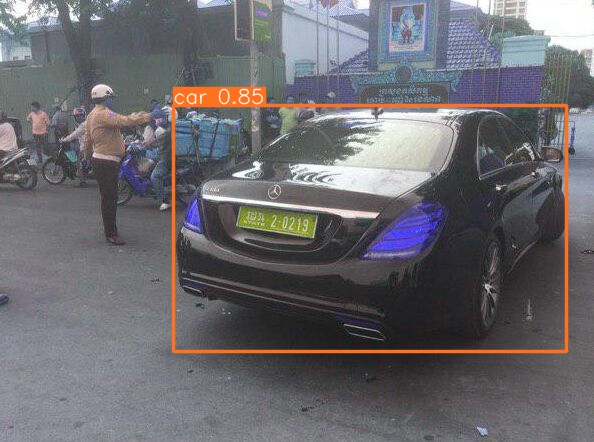

In [6]:
import torch
import cv2

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

model.classes = [2, 3, 5, 7] # detect only car, motorcycle, bus, and truck
model.conf = 0.50

img = cv2.imread('img/pZlqIGE.jpg')

results = model(img, size = 640)

results.show()


In [2]:
from sklearn.model_selection import train_test_split
import os

img_dir = os.listdir("C:/Users/nathk/Desktop/region_detect_datasets/img_gen")

train, test = train_test_split(img_dir, test_size= 0.3)
print(len(train))
print(len(test))

1612
692


In [3]:
test[0]

'0_Banteay-Meanchey-number-plate_6_jpeg.rf.f4a31bbf40aad3678762ab9e3c06b842.jpg'

In [6]:
import cv2
img = cv2.imread(os.path.join("C:/Users/nathk/Desktop/region_detect_datasets/img_gen", test[10]))

# Show the image
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
import easyocr

reader = easyocr.Reader(['en'])

txt = reader.readtext('test/task_0/rcaf-plates_vireak-mai.jpg', detail=0)
txt

['The Phnom Penh Post', 'ruinur 0r', '2.5000']

In [5]:
import torch

torch.__version__

'2.1.0.dev20230706+cu121'

In [6]:
torch.cuda.is_available()

True

In [4]:
from datetime import datetime

print(datetime.now())

2023-07-11 15:02:27.023497


### Preparing Dataset for YOLOv5 cls training

In [18]:
import numpy as np
import random
import shutil

def train_valid_test_split(data, valid_ratio=0.15, test_ratio=0.15):
    """
    Split a dataset into training, validation, and testing sets.

    Args:
        data (list, numpy array): The dataset to be split.
        valid_ratio (float): The ratio of validation data (default: 0.15).
        test_ratio (float): The ratio of testing data (default: 0.15).
        random_seed (int): Random seed for reproducibility (default: None).

    Returns:
        tuple: A tuple containing the train, valid, and test datasets.

    """
    

    # Calculate the sizes of each split
    num_samples = len(data)
    num_test = int(test_ratio * num_samples)
    num_valid = int(valid_ratio * num_samples)


    # Split the dataset
    test_data = data[:num_test]
    valid_data = data[num_test:num_test+num_valid]
    train_data = data[num_test+num_valid:]


    return train_data, valid_data, test_data

# to copy data
def copyData(base, target):
    shutil.copyfile(base, target)
    return base + '->' + target
    

In [19]:
import os
import shutil

base_dir = '../dataset_characters'
target_dir = '../character_cls_yolo'

base_dir_list = os.listdir(base_dir)

for sub in base_dir_list:
    # create sub directory for each train valid test
    os.makedirs(os.path.join(target_dir,"train", sub), exist_ok=True)
    os.makedirs(os.path.join(target_dir,"valid", sub), exist_ok=True)
    os.makedirs(os.path.join(target_dir,"test", sub), exist_ok=True)

    list_subs = os.listdir(os.path.join(base_dir, sub))

    train, valid, test = train_valid_test_split(list_subs, 0.15, 0.2)
    
    for d in train:
        copyData(os.path.join(base_dir, sub, d), os.path.join(target_dir, "train", sub, d))
    
    for d in valid:
        copyData(os.path.join(base_dir, sub, d), os.path.join(target_dir, "valid", sub, d))
    
    for d in test:
        copyData(os.path.join(base_dir, sub, d), os.path.join(target_dir, "test", sub, d))
        



In [4]:
data = train_valid_test_split(base_dir_list, 0.2, 0.2, 1)

data

(array(['G', '1', '7', 'F', 'E', '3', '0', 'O', 'Y', 'Z', 'L', 'H', 'N',
        '6', 'M', '4', 'D', 'U', 'A', 'B', 'K', 'X'], dtype='<U1'),
 array(['8', '2', 'S', '5', 'J', 'T', 'R'], dtype='<U1'),
 array(['Q', 'P', '9', 'W', 'V', 'C', 'I'], dtype='<U1'))

In [4]:
import torch

new_tensor = torch.tensor([5,2,6,1])

new_tensor[1].item()

2

In [9]:
u = torch.tensor([1,0])
v = torch.tensor([0,1])

torch.dot(u, v)


tensor(0)

In [12]:
import numpy as np

x = torch.tensor([0, np.pi/2, np.pi])
x

tensor([0.0000, 1.5708, 3.1416])

In [13]:
y = torch.sin(x)
y

tensor([ 0.0000e+00,  1.0000e+00, -8.7423e-08])

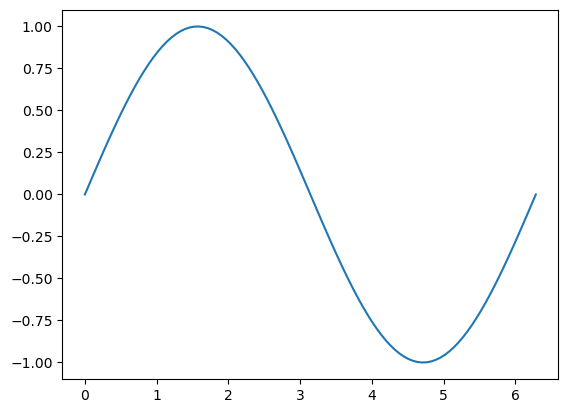

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

x = torch.linspace(0, 2*np.pi, 100)
y = torch.sin(x)

plt.plot(x.numpy(), y.numpy())

In [30]:
a = torch.linspace(-2,5, steps=9)
a.max()

tensor(5.)

## Two Dimensional Tensor

In [46]:
a = [
    [12,33,44],
    [55,44,65],
    [66,78,90]
]

b = [
    [2,2],
    [3,3],
    [4,4]
]

A = torch.tensor(a)
B = torch.tensor(b)

print(A.shape, B.shape)

torch.Size([3, 3]) torch.Size([3, 2])


In [47]:
# we can do matrix multiplication until row of the second matrix is equal to column of first matrix

result = torch.mm(A, B)
result

tensor([[299, 299],
        [502, 502],
        [726, 726]])

### Derivative

$ y(x) = x^2 $

$ y(2) = 2^2 = 4 $

$ \frac{dy(x)}{dx} = 2x^1 $

$ \frac{dy(2)}{dx} = 2(2) = 4 $

In [57]:
x = torch.tensor([2], requires_grad=True, dtype=torch.float64)
y = x**2
y.backward()
x.grad

tensor([4.], dtype=torch.float64)

$$
z(x) = x^2 + 2x + 1
$$

$$
z(2) = 2^2 + 2(2) + 1 = 9
$$

$$
\frac{dz(x)}{dx} = 2x + 2
$$

$$
\frac{dz(2)}{dx} = 2(2) + 2 = 6
$$

In [58]:
x = torch.tensor(2, requires_grad=True, dtype=torch.float32)

z = x**2 + 2*x + 1

z.backward()

x.grad

tensor(6.)

$$
    f(u, v) = uv + u^2
$$

$$
    \frac{\delta f(u,v)}{\delta u} = v + 2u
$$

$$
    \frac{\delta f(u, v)}{\delta v} = u
$$

### Simple Dataset

In [71]:
from torch.utils.data import Dataset

class toy_set(Dataset):
    def __init__(self, length = 100, transform = None):
        self.x = 2*torch.ones(length, 2)
        self.y = torch.ones(length, 1)
        self.len = length
        self.transform = transform

    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)
        return sample
    
    def __len__(self):
        return self.len
    

class add_mult(object):
    def __int__(self, addx=1, muly = 1):
        self.addx = addx
        self.muly = muly

    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x+self.addx
        y = y*self.muly
        sample = x, y

        return sample
    

In [70]:
dataset = toy_set()

for i in range(3):
    x, y = dataset[i]
    print('x:', x, 'y:', y)

x: tensor([2., 2.]) y: tensor([1.])
x: tensor([2., 2.]) y: tensor([1.])
x: tensor([2., 2.]) y: tensor([1.])


## Image Dataset

In [74]:
# import lib
from PIL import Image
import pandas as pd
import os
from matplotlib.pyplot import imshow
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms


In [77]:
# download dataset
import torchvision.datasets as dsets

dataset = dsets.MNIST(root= './data', train= False, download= True, transform= transforms.ToTensor())

dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

# Linear Regression Prediction

1. The predictor (independent) variable - x
2. The target (dependent) variable - y

$$
    y = b + wx
$$

- b: bias
- w: the slope or weight


In [5]:
import torch

w = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(-1.0, requires_grad=True)

def forward(x):
    y = w*x+b 
    return y

x = torch.tensor([1.0])

yhat = forward(x)

yhat

tensor([1.], grad_fn=<AddBackward0>)

$$
    x = \begin{bmatrix}
        1 \\
        2
    \end{bmatrix}
$$

$$
    \hat{y} = -1 + 2x
$$
$$
    \hat{y} = \begin{bmatrix}
                -1 \\
                -1
              \end{bmatrix}
              + 2 \begin{bmatrix}
                1 \\
                2
              \end{bmatrix}
$$

$$
    \hat{y} = \begin{bmatrix}
                -1 \\
                -1
              \end{bmatrix}
              + \begin{bmatrix}
                2*1 \\
                2*2
              \end{bmatrix}
$$

$$
  \hat{y} = \begin{bmatrix}
              -1 + 2 \\
              -1 + 4
            \end{bmatrix}
$$

$$
  \hat{y} = \begin{bmatrix}
              1 \\
              3
            \end{bmatrix}
$$

In [6]:
x = torch.tensor([
    [1],
    [2]
])

yhat = forward(x)

yhat

tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)

In [8]:
from torch.nn import Linear

torch.manual_seed(1)

model = Linear(in_features=1, out_features=1)

print(list(model.parameters()))

x = torch.tensor([0.0])
yhat = model(x)
yhat

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


tensor([-0.4414], grad_fn=<AddBackward0>)

In [9]:
x = torch.tensor([
    [1.],
    [2.]
])

yhat = model(x)
yhat

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)

$ D = \{(x_1 , y_1), .., (x_N , y_N)\} $

$ l(w,b) = \frac{1}{N} \sum\limits_{n = 1}^N (y_n - (wx_n + b))^2 $

$$
    \begin{array}{|c|c|}
    \hline
        l(w,b) & \hat{y} = b + wx  \\
    \hline
        l(-0.1, 1) = 0.78 & 1 - 0.1x  \\
    \hline
        l(-0.3, 2) = 0.0.19 & 2 - 0.3x \\
    \hline
        l(-0.8, 3) = 0.0.19 & 3 - 0.8x \\
    \hline
            

    \end{array}
$$


### Gradient Descent

A method to find the minimum of a function. Consider the loss function.

# Train Test Valid split by class for yolov5